# Information Entropy
- Trong phân này, ta sẽ tìm hiểu về information entropy, một công cụ mạnh mẽ dùng để giải thích thông tin được truyền qua những thử nghiệm như thế nào, chứng minh một số thuật toán quan trọng trong ML 

## Information Theory concept 
- Shannon information content của kết quả đầu ra x được định nghĩa : $$ h(x) = \log_2 \frac {1} {P(x)} $$ với P(x) là xác suất của x. Entropy của toàn bộ tập X được định nghĩa : $$ H(X) = \sum _x P(x)h(x) $$

- Ý nghĩa của nó là ước lượng độ bất ngờ khi một sự kiện xảy ra, với xác suất xảy ra thấp, độ bất ngờ của sự kiện rất lớn và ngược lại
- Information content cho ta biết có bao nhiêu bits thông tin phải được giải quyết khi sử dụng bất kì một chiến lược nào đó. Phân chia các trường hợp ra nhiều nhất có thể là một các dùng để tối ưu số lượng thông tin cần sử dụng. Để làm rõ hơn ta sẽ đi qua 2 ví dụ như sau : Xét bài toán cho 9 quả bóng trong đó có 1 quả có cân nặng khác nhau, giả sử ta có phép đo cân nặng. Làm sao để tìm ra quả bóng có cân nặng khác ? 
<a href = "https://machinelearningmastery.com/what-is-information-entropy/"> Đọc thêm </a>

![Local Image](./Image/Entropy_Concept_strate_1.png)

-  Với hướng tiếp cận 1, ta sẽ chọn ra 1 trong 9 quả và chia 8 quả còn lại thành 2 nhóm và đó chúng. Nếu bằng nhau thì khi đó quả lấy ra là quả nặng. từ đó ta có $ h(x) = \log _2 (9) $. Nếu ngược lại, ta tiếp tục đo và phân chia cho tới như trên, khi đó $ H(X) = \log _2 (9/8) + \log _2 (4) + \log _2 (2) = \log _2 (9) $   

![Local Image](./Image/Entropy_Concept_strate_2.png)

- Với hướng tiếp cận thứ 2, ta chia thành 3 nhóm với mỗi nhóm có 3 phần tử, và ta thực hiện đo tại bước đầu tiên tương tự như tiếp cận 1, nếu chúng bằng nhau thì khi đó $ h(x) = \log _2 (3) $. Do đó cs thể thấy, trường hợp thứ 2 này có thông tin nhỏ hơn so với tiếp cận 1. Do tiếp cận 2, tập xem xét có thể phân chia thành nhiều hơn. 

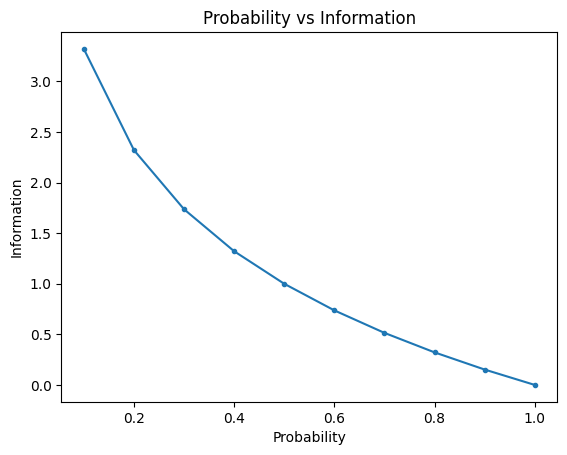

In [2]:
# compare probability vs information entropy
from math import log2
from matplotlib import pyplot
# list of probabilities
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# calculate information
info = [-log2(p) for p in probs]
# plot probability vs information
pyplot.plot(probs, info, marker='.')
pyplot.title('Probability vs Information')
pyplot.xlabel('Probability')
pyplot.ylabel('Information')
pyplot.show()

-  Biểu đồ trên so sánh mối tương quan giữa xác suất và thông tin. Như ở trên, ta chỉ đề cập tới thông tin của một sự kiện x, với một biến ngẫu nhiên X là trung bình số bits dùng để biểu diễn sự kiện được lấy ra từ phân bố của nó

## Properties of Information Entropy
- Dựa vào đề cập trên, ta có thể thấy, $H(X)$ là giá trị trung bình của thông tin do đó ta có tính chất $$ H(X) \geq 0 $$

- Giá trị entropy nhỏ nhất khi biến ngẫu nhiên khi xác suất của một sự kiện xảy ra là 1, và entropy lớn nhất khi biến ngẫu nhiên là phân bố đều 

In [3]:
# calculate the entropy for a dice roll
from math import log2
# the number of events
n = 6
# probability of one event
p = 1.0 /n
# calculate entropy
entropy = -sum([p * log2(p) for _ in range(n)])
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 2.585 bits


In [4]:
# calculate the entropy for a dice roll
from scipy.stats import entropy
# discrete probabilities
p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
# calculate entropy
e = entropy(p, base=2)
# print the result
print('entropy: %.3f bits' % e)

entropy: 2.585 bits


- Trong trường hợp, phân bố lệch hay một sự kiện có xác suất xảy ra lớn, khi đó sẽ kém bất ngờ dẫn tới giá trị entropy nhỏ và ngược lại. Đồ thị dưới biểu diễn các giá trị cặp xác suất xảy ra cho 1 sự kiện có 2 trường hợp, dễ thấy điều ta khẳng định là đúng

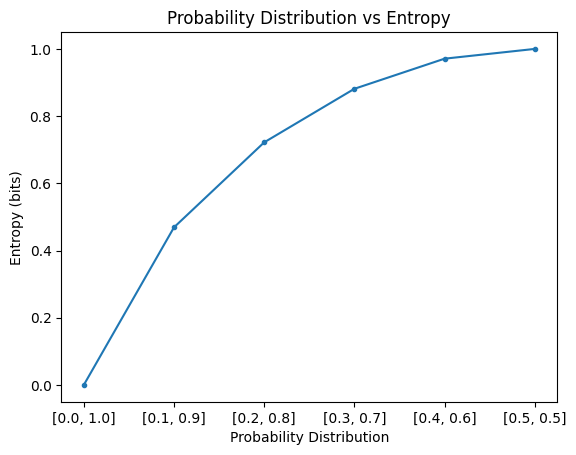

In [5]:
# calculate entropy
def entropy(events, ets=1e-15):
	return -sum([p * log2(p + ets) for p in events])

# define probabilities
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
# create probability distribution
dists = [[p, 1.0 - p] for p in probs]
# calculate entropy for each distribution
ents = [entropy(d) for d in dists]
# plot probability distribution vs entropy
pyplot.plot(probs, ents, marker='.')
pyplot.title('Probability Distribution vs Entropy')
pyplot.xticks(probs, [str(d) for d in dists])
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Entropy (bits)')
pyplot.show()

-  Tính entropy cho nhiều sự kiện như sau : $$ H(X,Y) = \sum _{x,y} P(x,y) \log_2 \frac 1 {P(x,y)} $$
- Nếu X, Y độc lập thì : $$ H(X,Y) = H(X) + H(Y) $$

## Kullback-Leibler Divergence
- Những khái niệm về entropy thông tin dẫn tới khái niệm về khoảng cách giữa các phân bố xác suất. Khoảng cách Kullback - Leibler giữa 2 phân bố xác suất P và Q được định nghĩa trên cùng một tập dữ liệu như sau : $$ D_{KL} (P,Q) =  \sum _x P(x) \log _2 \frac {P(x)} {Q(x)} $$
- Nó được dùng để tính lượng thông tin mất đi khi biểu diễn P theo Q
<a href = "https://machinelearningmastery.com/divergence-between-probability-distributions/"> Đọc thêm </a>
- Phép tính không có tính đối xứng $ KL (P || Q) != KL(Q || P) $

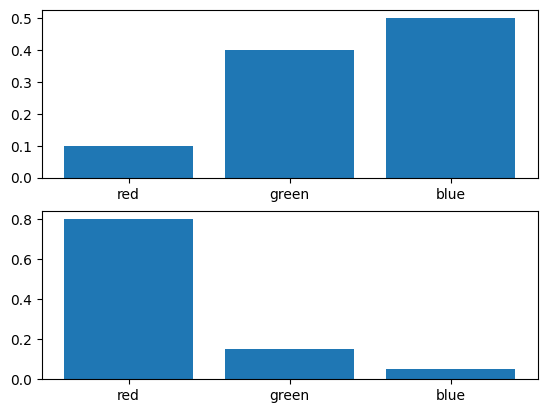

In [6]:
# generate 2 distribution 
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

In [7]:
def kl_divergence(p, q) : 
    return sum(p[i] * log2(p[i] / q[i]) for i in range(len(p)))

kl_pq = kl_divergence(p, q)
kl_qp = kl_divergence(q, p)
print('KL(P || Q): %.3f bits' % kl_pq)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.927 bits
KL(Q || P): 2.022 bits


## Conditional Entropy and Multual Information 
- Với hàm mật độ xác suất $p(X,Y)$, entropy có điều kiện được định nghĩa như sau : $$ H(Y|X) = -E_{X,Y}log(p(Y|X)) $$ Khi đó nó dẫn tới quan hệ : $$ H(X,Y) = H(X) + H(Y |X) $$
- Hàm quan hệ trên có quan hệ rất lớn khi với H(X) ta đã biết các thông tin về X do đó để quan sát thêm Y ta chỉ cần thông tin về Y khi đã biết X. Về mặt toán học nó có thể được giải thích bởi $p(X,Y) = p(Y|X) p(X) $
 

- Mutual Information được tính toán giữa 2 biến và ước lược độ giảm sự không chắc chắn của một biến khi biết giá trị của biến còn lại. Nó được tính toán bởi công thức : $$ I(X,Y) = H(X) - H(X|Y) $$ Vì mutual information đo lường độ phụ thuộc lẫn nhau giữa 2 biến ngẫu nhiên nên nó có tính chất đổi xứng $ I(X,Y) = I(Y,X) $

## Cross-Entropy as Maximum Likelihood
- Cross entropy là số bits trung bình cần thiết để mã hóa dữ liệu từ nguồn với phân bố p khi sử dụng mô hình q, nó được tính dựa vào công thức : $$ H(p, q) = - E_p [\log q] = - \sum _x p(x) \log q(x) $$ 
- Mục tiêu là cần tìm ra một mô hình q thỏa mãn nhất để mô tả dữ liệu nguồn, khi đó, cross entropy phải là nhỏ nhất. 
- Hàm log-likelihood là hàm được định nghĩa với D là tập dữ liệu quan sát dựa trên tham số $\theta$ như sau : $$ l(\theta) = \frac 1 N log P(D|\theta) $$
- Áp dụng công thức tính Cross entropy ta có : $$ H(P_D(x),  P_{\theta}(x)) = -\sum P_D(x) \log P_{\theta}(x) = -l(\theta) $$
=> Khi đó giá trị nhỏ nhất của cross entropy bằng maximum likelihood